In [1]:
import numpy as np
import pandas as pd
from seaborn import load_dataset
from matplotlib import pyplot as py
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import datetime as dt
from scipy.stats import pearsonr
import empyrical as ep
from IPython.display import Image
import numpy as np, numpy.random

In [2]:
liste=["HVS","IPV","SUA","TUA","YAY"]
Fund_prices=pd.read_csv("fund_prices.csv",index_col=0)

In [3]:
Fund_prices=Fund_prices[liste]

In [4]:
Fund_prices=Fund_prices.dropna(axis=0)

In [5]:
Returns=Fund_prices.pct_change()

In [6]:
Returns=Returns.dropna(axis=0)

<AxesSubplot:xlabel='date'>

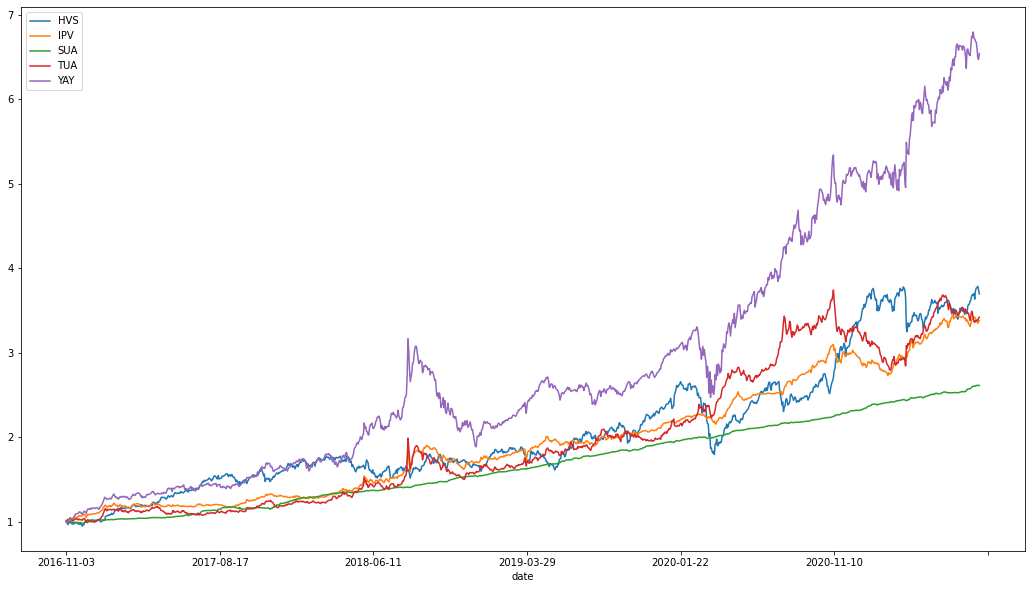

In [7]:
(1+Returns).cumprod().plot(figsize=(18,10))

In [8]:
df=pd.DataFrame(Returns.mean(),columns={"Mean"})
df["Std"]=pd.DataFrame(Returns.std())

In [9]:
df

,Mean,Std
HVS,0.001197,0.013983
IPV,0.001061,0.008592
SUA,0.000809,0.002353
TUA,0.001109,0.012406
YAY,0.001731,0.017461


In [10]:
random_weights=[]
for i in range(1000000):
    a = np.random.random(5)
    a /= a.sum()
    random_weights.append(a)

In [11]:
Randomweight_df=pd.DataFrame(random_weights,columns=["HVS","IPV","SUA","TUA","YAY"])
Randomweight_df

,HVS,IPV,SUA,TUA,YAY
0,0.181974,0.156203,0.229963,0.243938,0.187922
1,0.069440,0.131154,0.237164,0.129083,0.433158
2,0.011224,0.270873,0.286218,0.281113,0.150572
3,0.427937,0.078989,0.186606,0.187460,0.119009
4,0.254834,0.355492,0.014140,0.122355,0.253179
...,...,...,...,...,...
999995,0.027876,0.239619,0.409242,0.093686,0.229577
999996,0.207121,0.117913,0.248348,0.207864,0.218753
999997,0.259177,0.052587,0.260515,0.372743,0.054978
999998,0.221312,0.143738,0.208995,0.140751,0.285205


In [12]:
cov_matrix=Returns.cov()

In [13]:
cov_matrix

,HVS,IPV,SUA,TUA,YAY
HVS,0.000196,-9.170804e-06,1.406804e-05,-2.317087e-05,0.000026
IPV,-0.000009,7.381583e-05,-1.473795e-07,7.581628e-05,0.000080
SUA,0.000014,-1.473795e-07,5.534480e-06,-7.395221e-07,0.000001
TUA,-0.000023,7.581628e-05,-7.395221e-07,1.539184e-04,0.000099
YAY,0.000026,8.040207e-05,1.163998e-06,9.943319e-05,0.000305


In [14]:
Exp_ret=Randomweight_df.apply(lambda x: pd.Series([np.sqrt(x.dot(cov_matrix.dot(x))*252), df["Mean"].dot(x)*252,
                                                 df["Mean"].dot(x)*252/np.sqrt(x.dot(cov_matrix.dot(x))*252)]),axis=1)

In [15]:
Randomweight_df1=pd.concat([Randomweight_df,Exp_ret],axis=1)

In [16]:
Randomweight_df1.rename( columns={0 :'Risk',1:'Return',2:'Sharpe-Ratio'}, inplace=True )

In [17]:
Randomweight_df1

,HVS,IPV,SUA,TUA,YAY,Risk,Return,Sharpe-Ratio
0,0.181974,0.156203,0.229963,0.243938,0.187922,0.110518,0.293724,2.657716
1,0.069440,0.131154,0.237164,0.129083,0.433158,0.147833,0.329396,2.228154
2,0.011224,0.270873,0.286218,0.281113,0.150572,0.113839,0.278442,2.445926
3,0.427937,0.078989,0.186606,0.187460,0.119009,0.117619,0.292605,2.487741
4,0.254834,0.355492,0.014140,0.122355,0.253179,0.134148,0.319457,2.381372
...,...,...,...,...,...,...,...,...
999995,0.027876,0.239619,0.409242,0.093686,0.229577,0.100153,0.282268,2.818371
999996,0.207121,0.117913,0.248348,0.207864,0.218753,0.111430,0.298187,2.676004
999997,0.259177,0.052587,0.260515,0.372743,0.054978,0.102045,0.273564,2.680813
999998,0.221312,0.143738,0.208995,0.140751,0.285205,0.122382,0.311571,2.545884


In [18]:
x=np.sqrt((df.Std**2)*252)
y=df.Mean*252

C:\Users\atade\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atade\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Portfolio Optimizion')

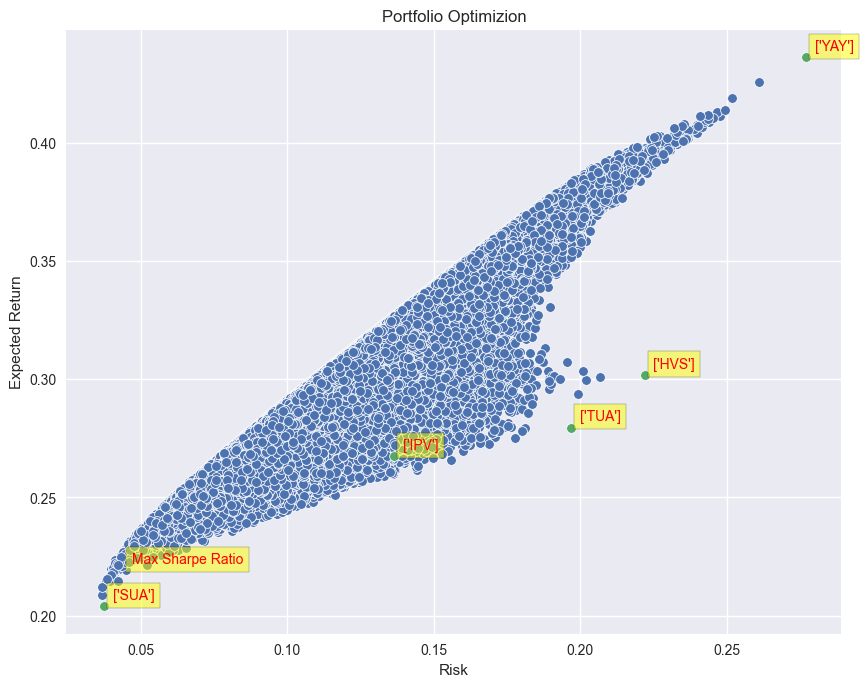

In [42]:
liste=["HVS","IPV","SUA","TUA","YAY"]
py.figure(figsize=(10,8),dpi=100)
py.style.use('seaborn')
sns.scatterplot(Randomweight_df1.Risk,Randomweight_df1.Return)
sns.scatterplot(x,y)
for i in liste:
    py.text(x=x[i]+0.003,y=y[i]+0.003,s=[i],fontdict=dict(color="red",size=10),bbox=dict(facecolor='yellow',alpha=0.5))
py.text(x=a.Risk+0.01 ,y=a.Return+0.01 ,s="Max Sharpe Ratio",fontdict=dict(color="red",size=10),bbox=dict(facecolor='yellow',alpha=0.5))
py.xlabel("Risk")
py.ylabel("Expected Return")
py.title("Portfolio Optimizion")

In [20]:
Maxmin_RR=pd.DataFrame(Randomweight_df1.iloc[Randomweight_df1['Sharpe-Ratio'].idxmax()])

In [36]:
a=Randomweight_df1.iloc[Randomweight_df1['Sharpe-Ratio'].idxmax()]
a

HVS             0.006871
IPV             0.046487
SUA             0.904269
TUA             0.033302
YAY             0.009070
Risk            0.036808
Return          0.212197
Sharpe-Ratio    5.764900
Name: 913851, dtype: float64

In [22]:
Maxmin_RR=Maxmin_RR.merge(Randomweight_df1.iloc[Randomweight_df1['Sharpe-Ratio'].idxmin()],on=Maxmin_RR.index)

In [29]:
Maxmin_RR=Maxmin_RR.rename(columns={'key_0':'Portfolio',913851:'Expected_Max_Sharpe_Ratio',71030:'Expected_Min_Sharpe-Ratio'})

In [30]:
Maxmin_RR

,Portfolio,Expected_Max_Sharpe_Ratio,Expected_Min_Sharpe-Ratio
0,HVS,0.006871,0.924562
1,IPV,0.046487,0.000992
2,SUA,0.904269,0.044545
3,TUA,0.033302,0.003250
4,YAY,0.009070,0.026652
5,Risk,0.036808,0.206772
6,Return,0.212197,0.300848
7,Sharpe-Ratio,5.764900,1.454974


C:\Users\atade\AppData\Local\Temp/ipykernel_8984/2494636788.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  py.pie(Maxmin_RR.loc[0:4]["Expected_Max_Sharpe_Ratio"],labels=label_list,autopct="%.1f%%", pctdistance=0.5)


Text(0.5, 1.0, 'Expected Maximum Sharpe Ratio')

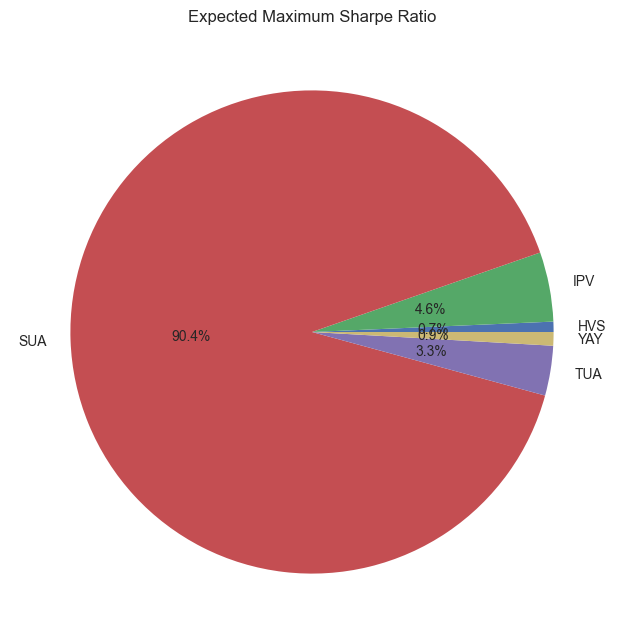

In [31]:
label_list=["HVS","IPV","SUA","TUA","YAY"]
py.figure(figsize=(10,8),dpi=100)
py.pie(Maxmin_RR.loc[0:4]["Expected_Max_Sharpe_Ratio"],labels=label_list,autopct="%.1f%%", pctdistance=0.5)
py.title("Expected Maximum Sharpe Ratio")

Text(0.5, 1.0, 'Expected Minumum Sharpe Ratio')

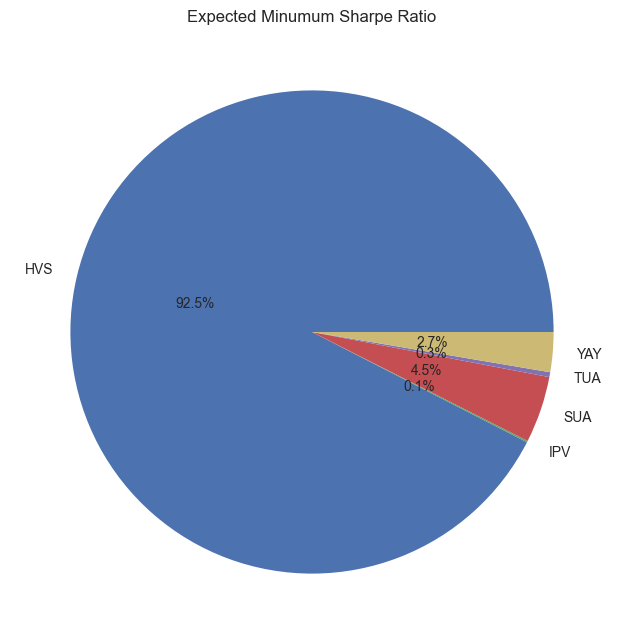

In [32]:
py.figure(figsize=(10,8),dpi=100)
py.pie(Maxmin_RR.loc[0:4]["Expected_Min_Sharpe-Ratio"],labels=label_list,autopct="%.1f%%", pctdistance=0.5,)
py.title("Expected Minumum Sharpe Ratio")